In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('data/titanic.csv')

UNDERSTANDING THE DATA

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DATA PREPARATION

In [7]:
df.drop(columns=['Cabin','Embarked'],inplace=True)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [9]:
df.rename(columns={'SibSp':'num_siblings_spouses','Parch':'num_parent_children'},inplace=True)

In [10]:
df.isna().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                     177
num_siblings_spouses      0
num_parent_children       0
Ticket                    0
Fare                      0
dtype: int64

In [11]:
df.loc[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,num_siblings_spouses,num_parent_children,Ticket,Fare


ANALYSIS


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,num_siblings_spouses,num_parent_children,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [13]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

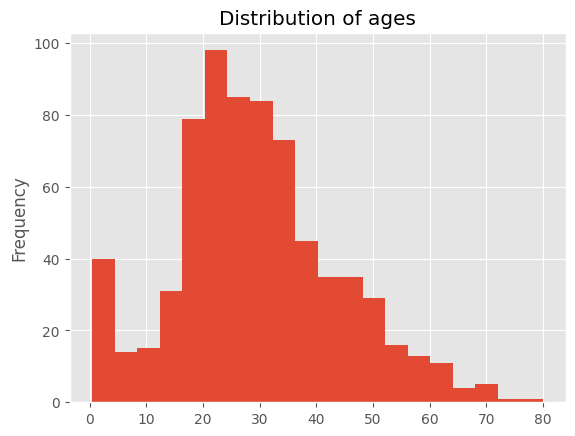

In [22]:
graph3=df['Age'].dropna().plot(kind="hist",bins=20,title='Distribution of ages')

Most common age is betwen 20 and 25, but interestingly there is a local peak between 0 and 5 which suggests there were a lot of children on board as well.

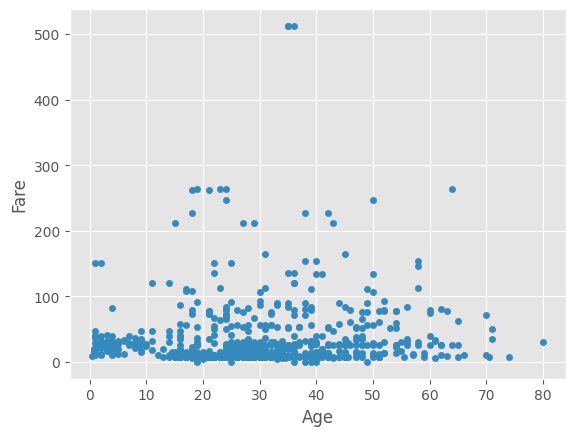

In [15]:
df.plot(kind="scatter",x='Age',y='Fare')
plt.show()

There are a couple of outliers but mostly, age and cost of ticket seem to have no correlation. 

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,num_siblings_spouses,num_parent_children,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [17]:
total_popn=len(df['Sex'])
male_survive=df.loc[(df['Survived']==1) & (df['Sex']=='male'),['Survived','Sex']].value_counts().values
male_total=df.loc[df['Sex']=='male','Sex'].value_counts().values
male_ratio=(male_survive/male_total)[0]
female_survive=df.loc[(df['Survived']==1) & (df['Sex']=='female'),['Survived','Sex']].value_counts().values
female_total=df.loc[df['Sex']=='female','Sex'].value_counts().values
female_ratio=(female_survive/female_total)[0]
female_ratio


0.7420382165605095

<Axes: xlabel='Survived', ylabel='count'>

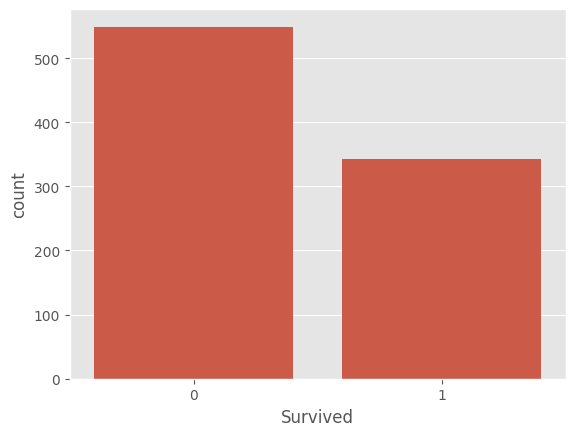

In [19]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

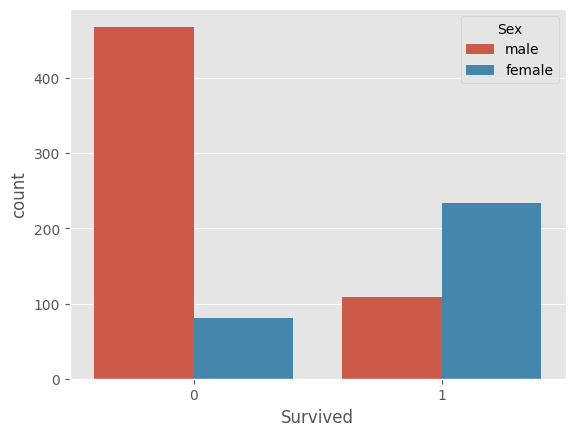

In [20]:
sns.countplot(x='Survived',hue='Sex',data=df)

Larger proportion of females survived compared to males

<Axes: xlabel='Survived', ylabel='count'>

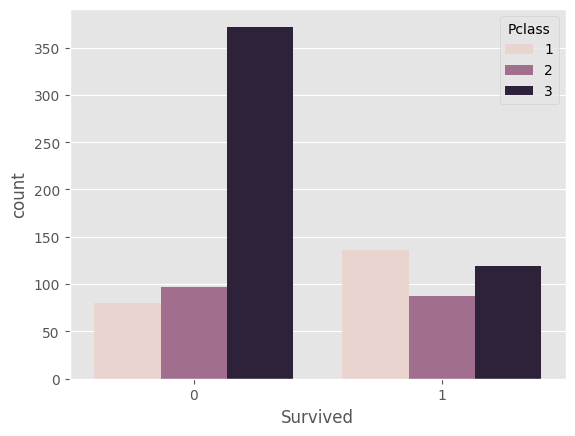

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=df)

Those in the lower class (class 3) suffered most casualties

<Axes: xlabel='num_siblings_spouses', ylabel='count'>

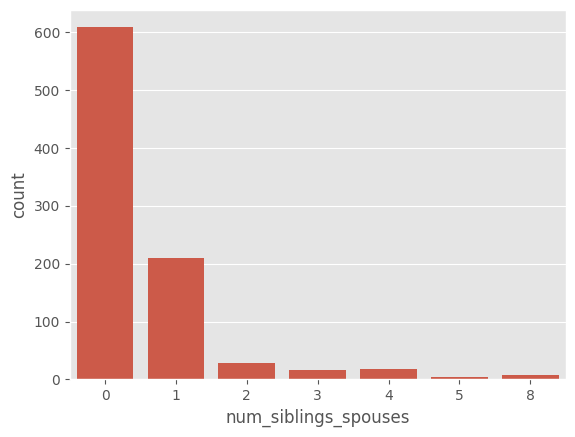

In [23]:
sns.countplot(x='num_siblings_spouses',data=df)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,num_siblings_spouses,num_parent_children,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


<Axes: xlabel='Pclass', ylabel='Age'>

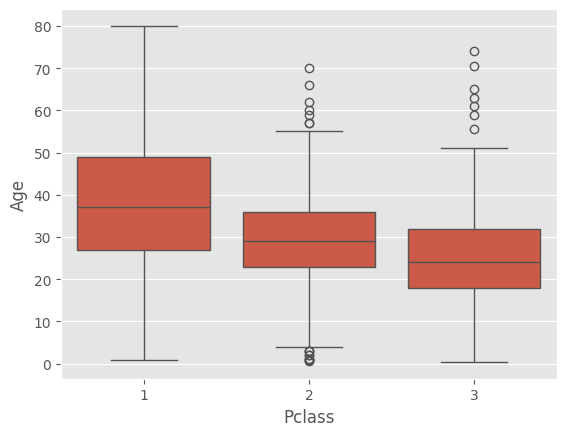

In [26]:
sns.boxplot(x='Pclass',y='Age',data=df)

<Axes: >

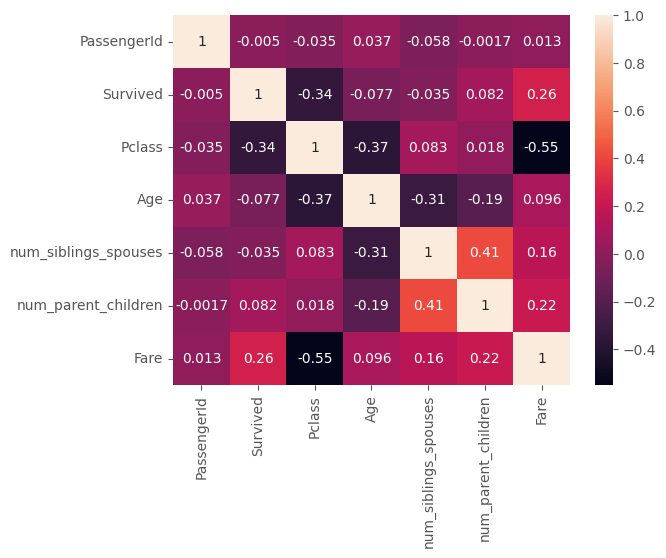

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True)